<a href="https://colab.research.google.com/github/0ginny/TIL/blob/main/240326__%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리

In [1]:
import numpy as np

In [10]:
import tensorflow as tf


In [18]:
import matplotlib.pyplot as plt

### 소프트맥스

In [6]:
def softmax(x):
    exp_x= np.exp(x)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x

    return y

In [7]:
x = np.array([1.5,3.6,4.5])
y = softmax(x)
print(y)

[0.03418604 0.27916901 0.68664495]


In [9]:
y.sum() # 즉 각 요소가 확률이고, 분류에서 많이 쓰임

1.0

## 신경망 실습

### 데이터 확인

In [11]:
from keras.datasets import fashion_mnist

In [45]:
fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [12]:
(X_train_data, t_train_data), (x_test_Data, t_test_data) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [16]:
x_train = X_train_data
x_test = x_test_Data
t_train = t_train_data
t_test = t_test_data

In [17]:
print("x_train shape : " , x_train.shape, "t train shape : " , t_train.shape)

# 28* 28 픽셀, 데이터 갯수가 6만개

x_train shape :  (60000, 28, 28) t train shape :  (60000,)


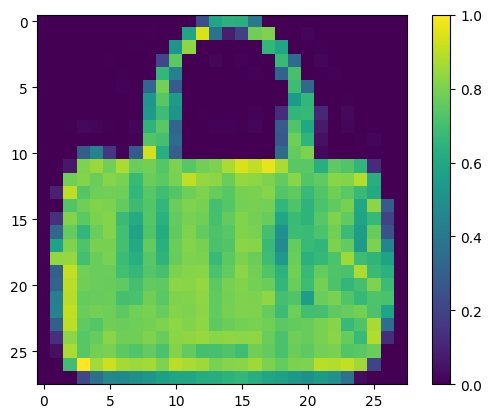

In [36]:
plt.imshow(x_train[4000])
plt.colorbar()

In [21]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# 0~255 픽셀 범위에 맞춰서 값의 범위를 0~1로 조정하기 위해 나눔

In [25]:
# 모델 구성

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(256,activation = tf.nn.sigmoid ),
    tf.keras.layers.Dense(10,activation = tf.nn.softmax )
])

In [37]:
# 모델 컴파일
model.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
#sgd : 확률적 격사감 법, gradient를 구하느데 1개 데이터만 사용, 반복이 많을 땐 효과적
# 글자 틀리면 모델 돌릴 때 에러가 뜨네, 확실하게 하거나 틈틈이 검토해야할 듯.

In [34]:
t_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [38]:
model.fit(x_train, t_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 1.1928 - accuracy: 0.6772
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7329 - accuracy: 0.7596
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6370 - accuracy: 0.7814
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5867 - accuracy: 0.7960
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5534 - accuracy: 0.8084


In [43]:
# 정확도 평가

test_loss , test_accuracy = model.evaluate(x_test, t_test)
print('정확도 : ', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.5600 - accuracy: 0.8010
정확도 :  0.8009999990463257


In [41]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.5600 - accuracy: 0.8010


[0.5599542260169983, 0.8009999990463257]

## CNN 실습

### 전처리


In [47]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))
# 차원을 늘리기 위해

In [48]:
# 모델 만들기

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, strides  = (1,1), kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters = 32, strides  = (1,1), kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters = 32, strides  = (1,1), kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),  # 펴주기
    tf.keras.layers.Dense(64,activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(10,activation = tf.nn.softmax)
])
# kernel size = filter size

In [50]:
# 모델 컴파일

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# adam 이라는 건 momentum 과 adagrid를 섞은 기법, 가장 많이 쓰임
# momentum은 sgd를 보완해준 거, 그리고 기울기 업데이트시 폭을 조절하는 역할
# adagrad는 학습률과 학습 시간 사이의 관계 속의 절충안

In [51]:
# 모델 훈련

model.fit(x_train, t_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 13s 4ms/step - loss: 0.7510 - accuracy: 0.7313
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5040 - accuracy: 0.8164
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4396 - accuracy: 0.8387


In [53]:
# 정확도 평가

test_loss , test_accuracy = model.evaluate(x_test, t_test)
print('정확도 : ',test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.4359 - accuracy: 0.8414
정확도 :  0.8414000272750854


## RNN 실습

In [54]:
(x_train_data, y_train_data), (x_test_Data, y_test_data) = fashion_mnist.load_data()

In [55]:
x_train = x_train_data
x_test = x_test_Data
y_train = y_train_data
y_test = y_test_data

In [56]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [59]:
# 모델 만들기

model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(128),
    tf.keras.layers.Dense(64, activation = tf.nn.tanh),
    tf.keras.layers.Dense(10,activation = tf.nn.softmax)
])

In [61]:
#모델 컴파일

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [63]:
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 19s 9ms/step - loss: 0.6461 - accuracy: 0.7682
Epoch 2/3
1875/1875 [==============================] - 20s 10ms/step - loss: 0.5106 - accuracy: 0.8176
Epoch 3/3
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4733 - accuracy: 0.8290


In [64]:
# 정확도 평가
test_loss, test_accuracy = model.evaluate(x_test,y_test)
print('정확도 : ', test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.4989 - accuracy: 0.8214
정확도 :  0.821399986743927
